In [2]:
import matplotlib.pyplot as plt
import numpy as np

# The Traveling Salesman Problem and Genetic Algorithms

## Theoretical framework

The Traveling Salesman Problem (TSP) consists of a set of $N_\mathrm{C}$ cities that a salesman has to visit following a path that is closed (i.e., starts and ends in the same place) and it is characterized by the shortest possible total length. One way to formalize this, is to consider the positions $\{\vec{x}_1,\vec{x}_2, ..., \vec{x}_{N_\mathrm{C}}\}$ in which the cities are located and to find the path $P$ such that $L(P)$ is miniimzed. Here $L(P)$ represents a loss or cost function and can be chosen in many different ways. In this case it is defined simply as the distance between cities

$
L(P)=\sum_{j=1}^{N_\mathrm{C}} |\vec{x}_{j+1}-\vec{x}_j|+|\vec{x}_1-\vec{x}_{N_\mathrm{C}}|,
$

where the index $j$ refers to the order in which the cities are featured in the specific path $P$.

In this project two TSPs are solved: the first features 34 cities randomly placed on a circumference, then 34 cities are distribuited inside a square. To solve both problems I deisgned a genetic algorithm.

Genetic Algorithms (GAs) were introduced by John Holland between the 1960s and the 1970s as a way to mimic biological evolution to solve computational problems, optimization in particular, making use of concepts like random genetic variations and natural selection. In practice, when using a GA, each possible solution to the problem is modeled as a chromosome, i.e., a sequence of genes. A set of chromosomes, called a population, is considered and has to undergo a series of both random and loss-function-based operations so that a new population is generated from the initial one. Each time a new population is created a generation has passed, and the process is repeated untill the best chromosome of various subsequent generations does not change substantially (i.e., the algorithm converges towards a minimum of the loss function).

In the context of the TSP, cities are the genes that are collected in paths or chromosomes. When a population made of $N_\mathrm{P}$ paths is generated, three operators are applied to it: selection, crossover and mutation. The selection operator has the job is to pick $N_\mathrm{P}/2$ couples of chromosomes for reproduction. The choice is made with a mechanism similar to an informed roulette weel: paths with a low loss function are more likely to be chosen as "parents" for the next generation. Crossover is the process thanks to which two chromosomes selected as parents can reproduce and create two new chromosomes (their children). There are many ways to implement this operation, I opted for the following procedure:

1) the mother and father paths are cut in the same randomly selected position (e.g., $[1\,2\,3\,|\,4\,5\,6]$ and $[1\,5\,4\,|\,3\,6\,2]$);
2) all the elements before the cut are kept as they are;
3) all the elements after the cutting point in the mother are ordered as they appear in the father and vice versa (e.g., $[1\,2\,3\,|\,5\,4\,6]$ and $[4\,5\,1\,|\,2\,3\,6]$).

In nature reproduction is highly influenced by randomness, so first of all this kind of operation is applied with a certain probability (60\% of the times crossover takes place, otherwise the children are simply copies of the parents) and then, in any case, the two children have to undergo a series of mutations. In this program the mutation operator can operate up to four kinds of changes on a chromosome, each regulated by its own probability (i.e., there is a certain chance the first kind of mutation is applied, then, independently from it, a second mutation can happen with a certain probability and so on). The mutations are:

1) two genes (cities) are randomly chosen and swapped;
2) the first $m$ genes are shifted forward of $n$ places ($m$ and $n$ being randomly chosen);
3) $m$ genes in the first half of the chromosome are swapped with $m$ genes in the second half ($m$ always random);
4) the order of $m$ neighboring genes starting at prosition $n$ is reversed ($m$ and $n$ being randomly chosen).

Of course, because of the constraints initially fixed for each path, the first and last gene are excluded from any possible change. This way each path is for sure closed and, by using always the same city as starting point, paths that differ only for a shift are considered equal. The key to make this kind of algorithm work is to find a good balance between loss-function-based decision, so that the optimization actually takes place, and random-based operations, useful to avoind stagnation and to move in the space of all possible chromosomes more efficiently.

What follows is a brief discussion concerning the solutions I found to the two TSPs under consideration. For each of them three plots are presented: the first evaluates the average value of the loss function of the $N_\mathrm{P}/2$ best paths in each generation, the second shows the loss function of the best path in each population and then the best path through all the explored generations is displayed. The numbers $N_\mathrm{P}$ and $N_\mathrm{G}$ (number of generations) have been chosen after some brute-force tuning and what I noticed is that in both cases choosing a high value for $N_\mathrm{P}$ had a greater - and better - impact on the results than increasing $N_\mathrm{G}$.

## Cities on a circumference

Here $N_\mathrm{C}=34$ cities are randomly placed on the unit circle and the best path resulting from the analysis is, as expected, the one that most accurately follows the circumference. In this - very simple - case, it is therefore straightforward to verify that the optimal solution found by the GA corresponds to the global minimum of the loss function. The first 70 geenrations are considered burn-in, then the algorithm reatches convergence as all the paths explored become very close, if not equal, to the optimal one.

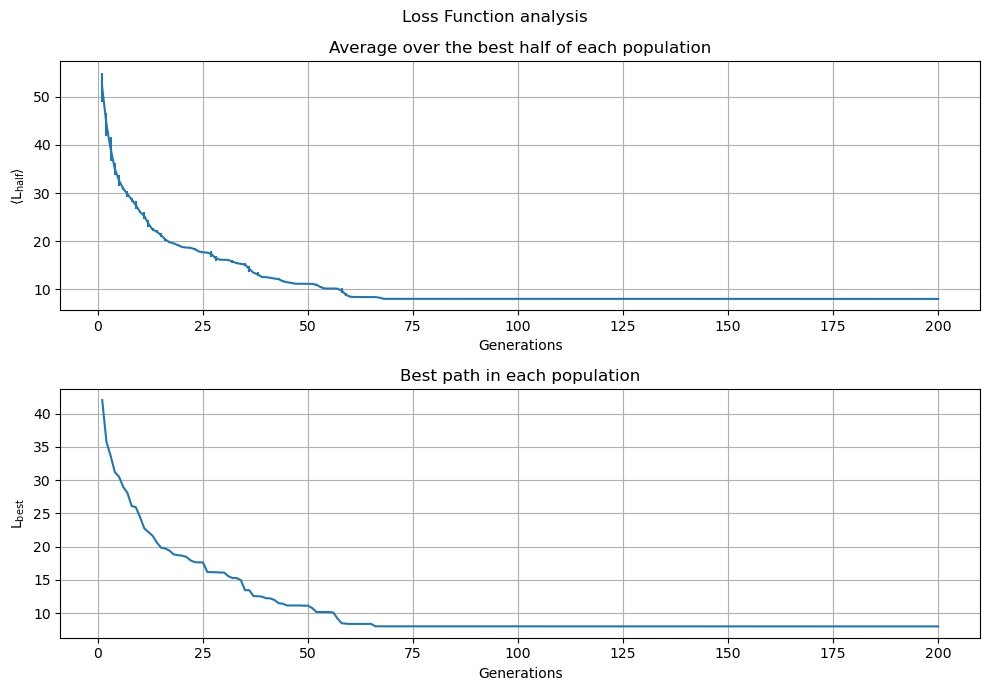

In [11]:
cNstep=200  #number of generations
cx=np.arange(cNstep)+1  #x-coordinates for the plot

#loss function of best path after each generation
cbestL=np.loadtxt("cbestloss.dat",  unpack="true")
#mean value and standard deviation for loss function of each population's best half
cmeanL, cerrorsL=np.loadtxt("cbesthalfloss.dat", usecols=(0, 1),  unpack="true")  

cfig ,(cplt1, cplt2) = plt.subplots(2, 1, figsize=(10, 7))

cplt1.errorbar(cx, cmeanL, yerr=cerrorsL)
cplt1.set_xlabel("Generations")
cplt1.set_ylabel(r"$\left<\mathrm{L_{half}}\right>$")
cplt1.set_title("Average over the best half of each population")
cplt1.grid(True)

cplt2.plot(cx, cbestL)
cplt2.set_xlabel("Generations")
cplt2.set_ylabel(r"$\mathrm{L_{best}}$")
cplt2.set_title("Best path in each population")
cplt2.grid(True)

cfig.suptitle("Loss Function analysis")
cfig.tight_layout()
plt.show()

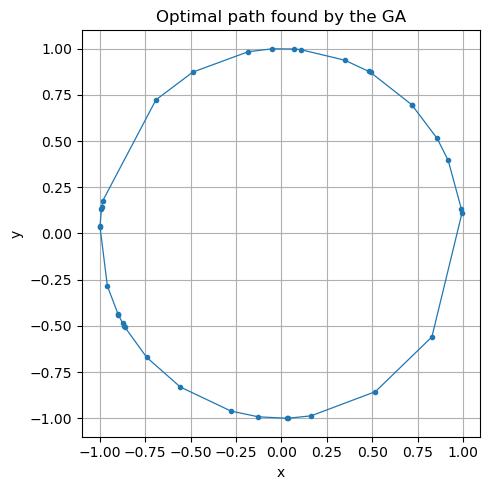

In [13]:
#optimal path found
cpathx, cpathy=np.loadtxt("cbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(cpathx, cpathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Optimal path found by the GA")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()

## Cities in a square

This time $N_\mathrm{C}=34$ cities are randomly placed in a square with unit side. Here the optimal path is less obvious to determine with respect to the previous case, but the one found by the genetic algorithm does not cross itself and the evolution of the loss function (both evaluated over the best half and the single best path of each population) over different generations is as expected. Therefore, it is safe to conclude that the GA actually worked and found at least a local minimum of the cost function associated to the problem. Here the convergence is reached after about 170 generations, the longer burn-in indicating a higher complexity than the unit circle TSP.

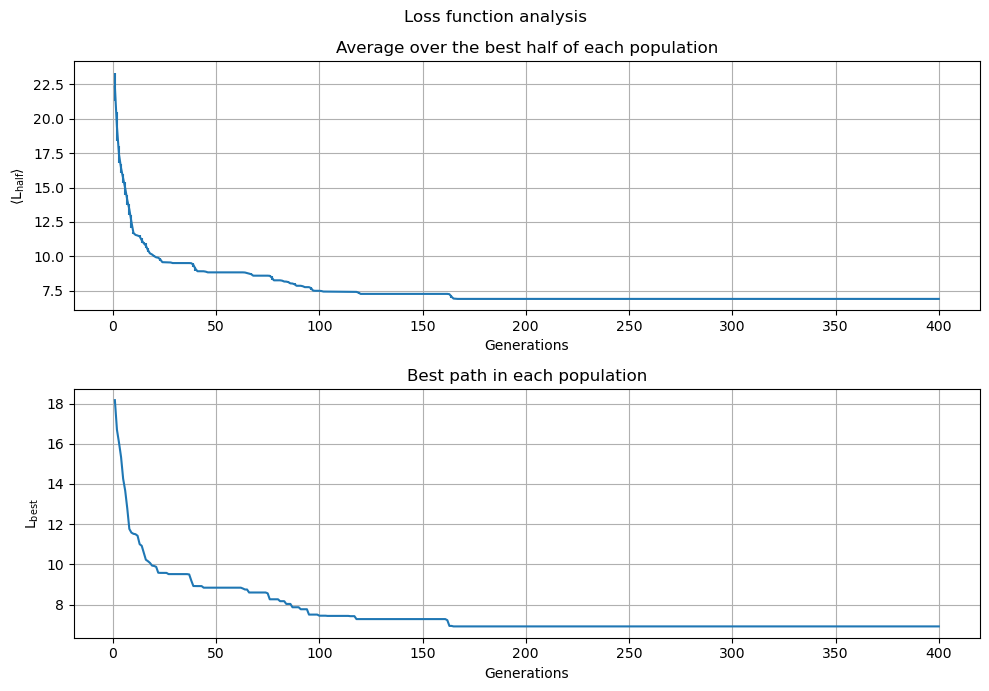

In [14]:
sNstep=400  #number of generations
sx=np.arange(sNstep)+1  #x-coordinates for the plot

#loss function of best path after each generation
sbestL=np.loadtxt("sbestloss.dat",  unpack="true")
#mean value and standard deviation for loss function of each population's best half
smeanL, serrorsL=np.loadtxt("sbesthalfloss.dat", usecols=(0, 1),  unpack="true")  

sfig ,(splt1, splt2) = plt.subplots(2, 1, figsize=(10, 7))

splt1.errorbar(sx, smeanL, yerr=serrorsL)
splt1.set_xlabel("Generations")
splt1.set_ylabel(r"$\left<\mathrm{L_{half}}\right>$")
splt1.set_title("Average over the best half of each population")
splt1.grid(True)

splt2.plot(sx, sbestL)
splt2.set_xlabel("Generations")
splt2.set_ylabel(r"$\mathrm{L_{best}}$")
splt2.set_title("Best path in each population")
splt2.grid(True)

sfig.suptitle("Loss function analysis")
sfig.tight_layout()
plt.show()

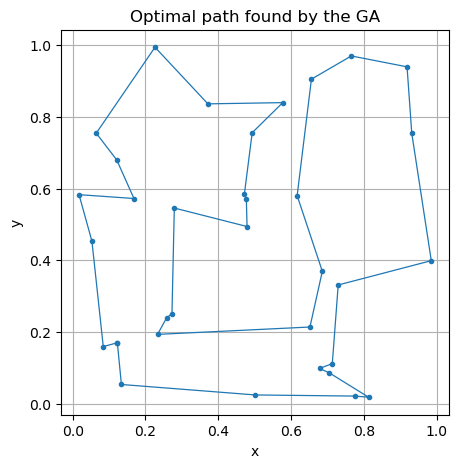

In [16]:
#resulting optimal path
spathx, spathy=np.loadtxt("sbestpath.dat", usecols=(0, 1),  unpack="true")

plt.figure(figsize=(5, 5))
plt.plot(spathx, spathy, marker='.', linewidth=0.9)
plt.grid()
plt.title("Optimal path found by the GA")
plt.xlabel("x")
plt.ylabel("y")
plt.show()